In [1]:
import sys
import os

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

sys.path.append(f'{os.getcwd()}/../src')
                
from genetist import Genetist

In [2]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor

In [3]:
fixed_params = {
    'max_depth': list(range(1, 15)),
    'n_estimators': list(range(20, 200)),
    'learning_rate': [0.0005, 0.001, 0.01, 0.05, 0.1],
    'objective': ['regression', 'regression_l1']
}

params_space = {
    'max_depth': {'low': 1, 'high': 15},
    'learning_rate': {'low': 0.0005, 'high': 0.1},
    'n_estimators': {'low': 20, 'high': 200},
    'objective': {'choices': ['regression', 'regression_l1']},
}

def objective(individual):
    df = pd.read_csv('../datasets/california_housing.csv')
    df = pd.get_dummies(df, drop_first=True, dummy_na=True)    
    df.dropna(how='any', axis=0, inplace=True)
    
    X = df.drop('median_house_value', axis=1)
    y = df['median_house_value']
    
    max_depth = individual['max_depth']
    learning_rate = individual['learning_rate']
    n_estimators = individual['n_estimators']
    objective = individual['objective']
    
    maes = list()
    kf = KFold(n_splits=3)
    for train_indexes, test_indexes in kf.split(X):
        X_train, X_test = X.iloc[train_indexes, :], X.iloc[test_indexes, :]
        y_train, y_test = y.iloc[train_indexes], y.iloc[test_indexes]
        
        model = LGBMRegressor(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, objective=objective, n_jobs=2)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, predictions)
        maes.append(mae)
    
    return np.mean(maes)

In [4]:
genetist = Genetist(
    params=params_space,
    num_population=30,
    generations=30,
    elite_rate=0.1,
    prob_mutation=0.1,
)

results = genetist.optimize(objective=objective, direction='minimize')

print()
print(f'EXECUTION TIME={results.execution_time}')
print(f'BEST SCORE={results.best_score}')
print(f'BEST INDIVIDUAL={results.best_individual}')
print('BEST PER GENERATION:')
display(results.best_per_generation_dataframe)

RUNNING GENERATION 1 | BEST SCORE IS 45983.06067469037:   3%|▎         | 1/30 [00:11<05:22, 11.12s/it]

THE BEST SOLUTION IN GENERATION 1 IS: {'max_depth': 9, 'learning_rate': 0.06121366351882034, 'n_estimators': 163, 'objective': 'regression_l1'}


RUNNING GENERATION 2 | BEST SCORE IS 45862.33433796277:   7%|▋         | 2/30 [00:24<05:46, 12.38s/it]

THE BEST SOLUTION IN GENERATION 2 IS: {'max_depth': 13, 'learning_rate': 0.06620300076589586, 'n_estimators': 186, 'objective': 'regression_l1'}


RUNNING GENERATION 3 | BEST SCORE IS 45430.72512792883:  10%|█         | 3/30 [00:40<06:17, 13.99s/it]

THE BEST SOLUTION IN GENERATION 3 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 163, 'objective': 'regression_l1'}


RUNNING GENERATION 4 | BEST SCORE IS 45430.72512792883:  13%|█▎        | 4/30 [00:56<06:29, 14.97s/it]

THE BEST SOLUTION IN GENERATION 4 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 163, 'objective': 'regression_l1'}


RUNNING GENERATION 5 | BEST SCORE IS 45430.72512792883:  17%|█▋        | 5/30 [01:14<06:38, 15.93s/it]

THE BEST SOLUTION IN GENERATION 5 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 163, 'objective': 'regression_l1'}


RUNNING GENERATION 6 | BEST SCORE IS 45410.97436604267:  20%|██        | 6/30 [01:31<06:29, 16.22s/it]

THE BEST SOLUTION IN GENERATION 6 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 186, 'objective': 'regression_l1'}


RUNNING GENERATION 7 | BEST SCORE IS 45410.97436604267:  23%|██▎       | 7/30 [01:48<06:20, 16.54s/it]

THE BEST SOLUTION IN GENERATION 7 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 186, 'objective': 'regression_l1'}


RUNNING GENERATION 8 | BEST SCORE IS 45410.97436604267:  27%|██▋       | 8/30 [02:05<06:07, 16.73s/it]

THE BEST SOLUTION IN GENERATION 8 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 186, 'objective': 'regression_l1'}


RUNNING GENERATION 9 | BEST SCORE IS 45410.97436604267:  30%|███       | 9/30 [02:23<06:00, 17.16s/it]

THE BEST SOLUTION IN GENERATION 9 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 186, 'objective': 'regression_l1'}


RUNNING GENERATION 10 | BEST SCORE IS 45410.97436604267:  33%|███▎      | 10/30 [02:43<05:57, 17.89s/it]

THE BEST SOLUTION IN GENERATION 10 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 186, 'objective': 'regression_l1'}


RUNNING GENERATION 11 | BEST SCORE IS 45410.97436604267:  37%|███▋      | 11/30 [03:02<05:47, 18.31s/it]

THE BEST SOLUTION IN GENERATION 11 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 186, 'objective': 'regression_l1'}


RUNNING GENERATION 12 | BEST SCORE IS 45389.063977776656:  40%|████      | 12/30 [03:20<05:28, 18.23s/it]

THE BEST SOLUTION IN GENERATION 12 IS: {'max_depth': 15, 'learning_rate': 0.07659821965048146, 'n_estimators': 186, 'objective': 'regression_l1'}


RUNNING GENERATION 13 | BEST SCORE IS 45169.47137451967:  43%|████▎     | 13/30 [03:38<05:10, 18.29s/it] 

THE BEST SOLUTION IN GENERATION 13 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 197, 'objective': 'regression_l1'}


RUNNING GENERATION 14 | BEST SCORE IS 45169.47137451967:  47%|████▋     | 14/30 [03:58<04:57, 18.60s/it]

THE BEST SOLUTION IN GENERATION 14 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 197, 'objective': 'regression_l1'}


RUNNING GENERATION 15 | BEST SCORE IS 45126.554789602065:  50%|█████     | 15/30 [04:17<04:42, 18.84s/it]

THE BEST SOLUTION IN GENERATION 15 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 16 | BEST SCORE IS 45126.554789602065:  53%|█████▎    | 16/30 [04:37<04:28, 19.14s/it]

THE BEST SOLUTION IN GENERATION 16 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 17 | BEST SCORE IS 45126.554789602065:  57%|█████▋    | 17/30 [04:56<04:08, 19.13s/it]

THE BEST SOLUTION IN GENERATION 17 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 18 | BEST SCORE IS 45126.554789602065:  60%|██████    | 18/30 [05:16<03:51, 19.32s/it]

THE BEST SOLUTION IN GENERATION 18 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 19 | BEST SCORE IS 45126.554789602065:  63%|██████▎   | 19/30 [05:35<03:31, 19.23s/it]

THE BEST SOLUTION IN GENERATION 19 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 20 | BEST SCORE IS 45126.554789602065:  67%|██████▋   | 20/30 [05:54<03:11, 19.15s/it]

THE BEST SOLUTION IN GENERATION 20 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 21 | BEST SCORE IS 45126.554789602065:  70%|███████   | 21/30 [06:13<02:52, 19.15s/it]

THE BEST SOLUTION IN GENERATION 21 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 22 | BEST SCORE IS 45126.554789602065:  73%|███████▎  | 22/30 [06:33<02:34, 19.29s/it]

THE BEST SOLUTION IN GENERATION 22 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 23 | BEST SCORE IS 45126.554789602065:  77%|███████▋  | 23/30 [06:51<02:13, 19.14s/it]

THE BEST SOLUTION IN GENERATION 23 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 24 | BEST SCORE IS 45126.554789602065:  80%|████████  | 24/30 [07:11<01:55, 19.17s/it]

THE BEST SOLUTION IN GENERATION 24 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 25 | BEST SCORE IS 45126.554789602065:  83%|████████▎ | 25/30 [07:30<01:36, 19.35s/it]

THE BEST SOLUTION IN GENERATION 25 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 26 | BEST SCORE IS 45126.554789602065:  87%|████████▋ | 26/30 [07:49<01:17, 19.27s/it]

THE BEST SOLUTION IN GENERATION 26 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 27 | BEST SCORE IS 45126.554789602065:  90%|█████████ | 27/30 [08:10<00:59, 19.69s/it]

THE BEST SOLUTION IN GENERATION 27 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 28 | BEST SCORE IS 45126.554789602065:  93%|█████████▎| 28/30 [08:30<00:39, 19.85s/it]

THE BEST SOLUTION IN GENERATION 28 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 29 | BEST SCORE IS 45126.554789602065:  97%|█████████▋| 29/30 [08:51<00:19, 19.98s/it]

THE BEST SOLUTION IN GENERATION 29 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}


RUNNING GENERATION 30 | BEST SCORE IS 45126.554789602065: 100%|██████████| 30/30 [09:11<00:00, 18.37s/it]

THE BEST SOLUTION IN GENERATION 30 IS: {'max_depth': 12, 'learning_rate': 0.07659821965048146, 'n_estimators': 196, 'objective': 'regression_l1'}

EXECUTION TIME=0 hours 09 minutes 19.602670 seconds
BEST SCORE=45126.554789602065
BEST INDIVIDUAL=[12, 0.07659821965048146, 196, 'regression_l1']
BEST PER GENERATION:


,GENERATION,BEST_SCORE,BEST_INDIVIDUAL,max_depth,learning_rate,n_estimators,objective
14,15,45126.554790,"[12, 0.07659821965048146, 196, regression_l1]",12,0.076598,196,regression_l1
27,28,45126.554790,"[12, 0.07659821965048146, 196, regression_l1]",12,0.076598,196,regression_l1
26,27,45126.554790,"[12, 0.07659821965048146, 196, regression_l1]",12,0.076598,196,regression_l1
25,26,45126.554790,"[12, 0.07659821965048146, 196, regression_l1]",12,0.076598,196,regression_l1
24,25,45126.554790,"[12, 0.07659821965048146, 196, regression_l1]",12,0.076598,196,regression_l1
23,24,45126.554790,"[12, 0.07659821965048146, 196, regression_l1]",12,0.076598,196,regression_l1
22,23,45126.554790,"[12, 0.07659821965048146, 196, regression_l1]",12,0.076598,196,regression_l1
21,22,45126.554790,"[12, 0.07659821965048146, 196, regression_l1]",12,0.076598,196,regression_l1
20,21,45126.554790,"[12, 0.07659821965048146, 196, regression_l1]",12,0.076598,196,regression_l1
19,20,45126.554790,"[12, 0.07659821965048146, 196, regression_l1]",12,0.076598,196,regression_l1


<AxesSubplot:>

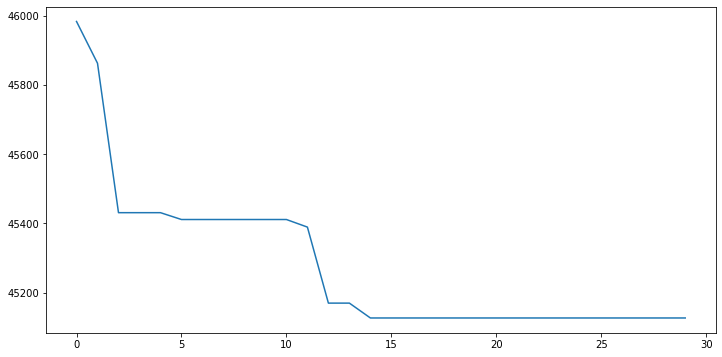

In [5]:
df_plot = results.best_per_generation_dataframe.sort_values(by=['GENERATION'])
df_plot.BEST_SCORE.plot(figsize=(12,6))